**IMPORTING THE LIBRARIES**

In [78]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno # for the missing data as a matrix

**IMPORTING THE DATA FILE**

In [79]:
dataset = pd.read_csv("Data.csv")#reads the csv file
x=dataset.iloc[:,0:3].values#couldhave used [:,:-1]# .values changes the data to array
y=dataset.iloc[:,-1].values#using [:,3:] changes the orientation
dataset.head()# prints the first 5 lines of the data ser

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [64]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [65]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


**DEALING WITH MISSING DATA**

1.   https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e
2. https://www.kaggle.com/dansbecker/handling-missing-values




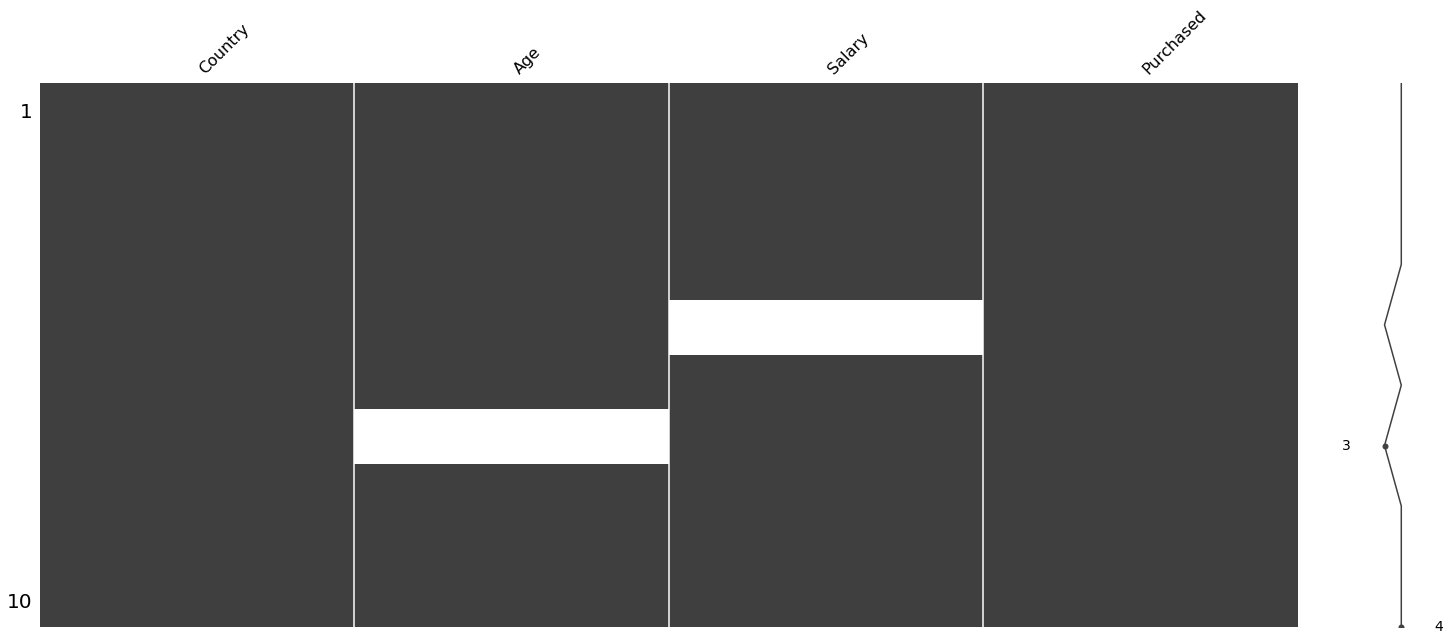

In [66]:
msno.matrix(dataset)

In [80]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(np.nan, strategy='mean')#or imputer= SimpleImputer(missing_values=np.nan, strategy='mean
#imputer.fit(x[:,1:3])
x[:,1:3]=imputer.fit_transform(x[:,1:3])

In [69]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


**ENCODING INDEPENDENT VARIABLE**

1.   https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd



In [83]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [82]:
print (x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [84]:
print(x)#without np.array

[[0.0 1.0 0.0 0.0 44.0 72000.0]
 [1.0 0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 1.0 38.0 61000.0]
 [1.0 0.0 1.0 0.0 40.0 63777.77777777778]
 [0.0 1.0 0.0 0.0 35.0 58000.0]
 [1.0 0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 0.0 48.0 79000.0]
 [1.0 0.0 1.0 0.0 50.0 83000.0]
 [0.0 1.0 0.0 0.0 37.0 67000.0]]


**ENCODING THE DEPENDENT VARIABLE**

In [94]:
from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()
y=np.array(le.fit_transform(y))

In [95]:
print (y)

[0 1 0 0 1 1 0 1 0 1]


**SPLITING THE DATA INTO TEST AND TRAIN SET**

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [99]:
print(x_train)

[[1.0 0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 1.0 0.0 40.0 63777.77777777778]
 [0.0 1.0 0.0 0.0 44.0 72000.0]
 [1.0 0.0 0.0 1.0 38.0 61000.0]
 [1.0 0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 0.0 48.0 79000.0]
 [1.0 0.0 1.0 0.0 50.0 83000.0]
 [0.0 1.0 0.0 0.0 35.0 58000.0]]


In [100]:
print(x_test)

[[1.0 0.0 1.0 0.0 30.0 54000.0]
 [0.0 1.0 0.0 0.0 37.0 67000.0]]


In [101]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [102]:
print(y_test)

[0 1]


**FEATURE SCALING**

1.   https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35
2. https://medium.com/technofunnel/what-when-why-feature-scaling-for-machine-learning-standard-minmax-scaler-49e64c510422



In [106]:
#we apply feature scaling to the features beyond[-3,3] range so the dummy /encoded variables dont get scaled
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
x_train[:,3:]=ss.fit_transform(x_train[:,3:])
#fit gets the mean and std deviation of the set and transfrom apply it 
x_test[:,3:]=ss.transform(x_test[:,3:])#we dont do the fit on the test set because itmust be scaled with the same scaler of the train set.if we apply the fir it will genrate a new mean and variance for the test set so when we predict the answer would be conqurent to the predictio

In [107]:
print(x_train)

[[1.0 0.0 0.0 1.2909944487358056 -0.19159184384578554 -1.0781259408412427]
 [1.0 0.0 1.0 -0.7745966692414833 -0.014117293757057846
  -0.07013167641635404]
 [0.0 1.0 0.0 -0.7745966692414833 0.5667085065333239 0.6335624327104546]
 [1.0 0.0 0.0 1.2909944487358056 -0.3045301939022487 -0.307866172742979]
 [1.0 0.0 0.0 1.2909944487358056 -1.901801144700799 -1.4204636155515822]
 [0.0 1.0 0.0 -0.7745966692414833 1.1475343068237056 1.2326533634535488]
 [1.0 0.0 1.0 -0.7745966692414833 1.4379472069688966 1.5749910381638883]
 [0.0 1.0 0.0 -0.7745966692414833 -0.7401495441200352 -0.5646194287757336]]


In [108]:
print(x_test)

[[1.0 0.0 1.0 2.7755575615628907e-17 30.0 54000.0]
 [0.0 1.0 0.0 2.7755575615628907e-17 37.0 67000.0]]
